<a href="https://colab.research.google.com/github/stawiskm/QSAR_LightGBM/blob/main/MAO_B_Regressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ACI Project: QSAR Regression models with RF and LightGBM on MAO-B inhibitors**
---


Marc Jermann   \ Patrick Meier


---

While quantitative structure-activity relationship
models are increasingly used nowadays, this study compares
two different machine learning methods in just such QSAR
models. The Light Gradient Boosting Machine method uses the
well established decision tree approach and has been optimized
for larger datasets. To test the applicability of this method, we
compare it with a Random Forest model, the existing state-of-the-
art method for such QSAR models, in three different applications.


---

In this Jupyter notebook, we will be building a real-life **data science project**.

---

## **Introduction**
Parkinson's disease is a progressive nervous system disorder that affects movement. Symptoms start gradually, sometimes starting with a barely noticeable tremor in just one hand. Tremors are common, but the disorder also commonly causes stiffness or slowing of movement.

In the early stages of Parkinson's disease, your face may show little or no expression. Your arms may not swing when you walk. Your speech may become soft or slurred. Parkinson's disease symptoms worsen as your condition progresses over time.

Although Parkinson's disease can't be cured, medications might significantly improve your symptoms. Occasionally, your doctor may suggest surgery to regulate certain regions of your brain and improve your symptoms.
(https://www.mayoclinic.org/diseases-conditions/parkinsons-disease/symptoms-causes/syc-20376055)

### *Monoamine Oxidase B*
Monoamine Oxidase Type B (MAO-B) is an enzyme in our body that breaks down several chemicals in the brain, including dopamine. By giving a medication that blocks the effect of MAO-B, an MAO-B inhibitor), more dopamine is available to be used by the brain. This can modestly improve many motor symptoms of PD. (https://www.parkinson.org/Understanding-Parkinsons/Treatment/Prescription-Medications/MAO-B-Inhibitors)

### *Literature regarding MAO B*

*  Comparative effectiveness of dopamine agonists and monoamine oxidase type-B inhibitors for Parkinson's disease: a multiple treatment comparison meta-analysis [(Eur J Clin Pharmacol)]()https://doi.org/10.1007/s00228-020-02961-6)

*   Monoamine Oxidase B Inhibitors in Parkinson's Disease [(CNS Neurol Disord Drug Targets)](https://doi.org/10.2174/1871527316666170124165222)

*  Long-term effectiveness of dopamine agonists and monoamine oxidase B inhibitors compared with levodopa as initial treatment for Parkinson's disease (PD MED): a large, open-label, pragmatic randomised trial [(Lancet)](https://doi.org/10.1016/s0140-6736(14)60683-8)









### *Monoamine oxidase type-B*

![picture](https://institute.progress.im/sites/default/files/styles/content_full/public/lundbeck_lic_illustrationer_02_09_depression_-_moa_of_mao-bi.png?itok=xCmdEPMO)

## **Investigating target protein**

In [1]:
# Install ChEMBL webresource client
! pip install chembl_webresource_client

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 55 kB 2.3 MB/s 
     |████████████████████████████████| 596 kB 11.5 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
  Attempting uninstall: itsdangerous
    Found existing installation: itsdangerous 1.1.0
    Uninstalling itsdangerous-1.1.0:
      Successfully uninstalled itsdangerous-1.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires itsdangerous<2.0,>=0.24, but you have itsdangerous 2.1.2 which is incompatible.


In [2]:
# Import necessary libraries
import pandas as pd 
from chembl_webresource_client.new_client import new_client

In [3]:
# Target search for Monoamine oxidase B (MAO-B), Parkinson (~5 minutes)
target = new_client.target
target_query = target.search('Monoamine oxidase B')
targets = pd.DataFrame.from_dict(target_query)
targets.head(10)

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Rattus norvegicus,Monoamine oxidase,32.0,False,CHEMBL2095196,"[{'accession': 'P19643', 'component_descriptio...",PROTEIN FAMILY,10116.0
1,[],Homo sapiens,Monoamine oxidase,32.0,False,CHEMBL2095205,"[{'accession': 'P21397', 'component_descriptio...",PROTEIN FAMILY,9606.0
2,[],Mus musculus,Monoamine oxidase,32.0,False,CHEMBL2111442,"[{'accession': 'Q8BW75', 'component_descriptio...",PROTEIN FAMILY,10090.0
3,[],Bos taurus,Monoamine oxidase,32.0,False,CHEMBL2111399,"[{'accession': 'P56560', 'component_descriptio...",PROTEIN FAMILY,9913.0
4,"[{'xref_id': 'P27338', 'xref_name': None, 'xre...",Homo sapiens,Monoamine oxidase B,31.0,False,CHEMBL2039,"[{'accession': 'P27338', 'component_descriptio...",SINGLE PROTEIN,9606.0
5,[],Mus musculus,Monoamine oxidase B,31.0,False,CHEMBL3050,"[{'accession': 'Q8BW75', 'component_descriptio...",SINGLE PROTEIN,10090.0
6,"[{'xref_id': 'P56560', 'xref_name': None, 'xre...",Bos taurus,Monoamine oxidase B,31.0,False,CHEMBL2756,"[{'accession': 'P56560', 'component_descriptio...",SINGLE PROTEIN,9913.0
7,"[{'xref_id': 'P19643', 'xref_name': None, 'xre...",Rattus norvegicus,Monoamine oxidase B,31.0,False,CHEMBL2993,"[{'accession': 'P19643', 'component_descriptio...",SINGLE PROTEIN,10116.0
8,[],Danio rerio,Amine oxidase [flavin-containing],24.0,False,CHEMBL1681610,"[{'accession': 'Q6NSN2', 'component_descriptio...",SINGLE PROTEIN,7955.0
9,"[{'xref_id': 'P21397', 'xref_name': None, 'xre...",Homo sapiens,Monoamine oxidase A,23.0,False,CHEMBL1951,"[{'accession': 'P21397', 'component_descriptio...",SINGLE PROTEIN,9606.0


In [4]:
# Regex filter to search for the term Monoamine oxidase followed by a B
targets.loc[(targets["organism"] == "Homo sapiens") & (targets["pref_name"].str.contains('Monoamine oxidase.*B', regex=True))]

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
4,"[{'xref_id': 'P27338', 'xref_name': None, 'xre...",Homo sapiens,Monoamine oxidase B,31.0,False,CHEMBL2039,"[{'accession': 'P27338', 'component_descriptio...",SINGLE PROTEIN,9606.0


In [5]:
# Selection of CHEMBL2039 as target, since it is referenced as Homo Sapiens and has the correct pref_name
selected_target = targets.target_chembl_id[4]
selected_target

'CHEMBL2039'

In [6]:
# Load activity data of the target filtered by half maximal inhibitory concentration (IC50) (~8min)
activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")
df = pd.DataFrame.from_dict(res)
df.head()

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,184069,[],CHEMBL706869,Compound was tested for inhibition of monoamin...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Monoamine oxidase B,9606,None,None,IC50,uM,UO_0000065,None,1000.0
1,None,185443,[],CHEMBL706869,Compound was tested for inhibition of monoamin...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Monoamine oxidase B,9606,None,None,IC50,uM,UO_0000065,None,1000.0
2,None,185700,[],CHEMBL734179,Inhibitory concentration against Monoamine oxi...,B,None,None,BAO_0000190,BAO_0000221,...,Homo sapiens,Monoamine oxidase B,9606,None,None,IC50,nM,UO_0000065,None,18.0
3,None,187020,[],CHEMBL734178,Inhibitory concentration against Monoamine oxi...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Monoamine oxidase B,9606,None,None,IC50,nM,UO_0000065,None,9.0
4,None,188355,[],CHEMBL734179,Inhibitory concentration against Monoamine oxi...,B,None,None,BAO_0000190,BAO_0000221,...,Homo sapiens,Monoamine oxidase B,9606,None,None,IC50,nM,UO_0000065,None,4.4


In [7]:
# Number of molecules (5067 Entries on April 25th 2022)
len(df)

5067

In [8]:
df.to_csv('MAOB_bioactivity.csv', index=False)

#### (possible shortcut)

In [9]:
df = pd.read_csv('https://github.com/stawiskm/QSAR_LightGBM/raw/main/data/MAOB_bioactivity.csv')

In [10]:
# Remove entries where standard_value is NAN
df2 = df[df.standard_value.notna()]
df2 = df2[df.canonical_smiles.notna()]
df2.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,NaN,184069,[],CHEMBL706869,Compound was tested for inhibition of monoamin...,B,NaN,NaN,BAO_0000190,BAO_0000357,...,Homo sapiens,Monoamine oxidase B,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,1000.0
1,NaN,185443,[],CHEMBL706869,Compound was tested for inhibition of monoamin...,B,NaN,NaN,BAO_0000190,BAO_0000357,...,Homo sapiens,Monoamine oxidase B,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,1000.0
2,NaN,185700,[],CHEMBL734179,Inhibitory concentration against Monoamine oxi...,B,NaN,NaN,BAO_0000190,BAO_0000221,...,Homo sapiens,Monoamine oxidase B,9606,NaN,NaN,IC50,nM,UO_0000065,NaN,18.0
3,NaN,187020,[],CHEMBL734178,Inhibitory concentration against Monoamine oxi...,B,NaN,NaN,BAO_0000190,BAO_0000357,...,Homo sapiens,Monoamine oxidase B,9606,NaN,NaN,IC50,nM,UO_0000065,NaN,9.0
4,NaN,188355,[],CHEMBL734179,Inhibitory concentration against Monoamine oxi...,B,NaN,NaN,BAO_0000190,BAO_0000221,...,Homo sapiens,Monoamine oxidase B,9606,NaN,NaN,IC50,nM,UO_0000065,NaN,4.4


In [11]:
# Subset of the dataframe only using the molecule_chembl_id, canonical_smiles and standard_value
selection = ['molecule_chembl_id','canonical_smiles','standard_value']
df3 = df2[selection]
df3.head()

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL156630,C/N=C1/CCc2c1n(C)c1ccc(OC(=O)NCc3ccccc3)c(Br)c21,1000000.0
1,CHEMBL155754,C/N=C1/CCc2c1n(C)c1ccc(OC(=O)NC)c(Cl)c21,1000000.0
2,CHEMBL350093,N#CCCN1CC(=O)OC(c2ccc(OCc3ccccc3)cc2)=N1,18.0
3,CHEMBL161907,O=c1c(=O)c2ccc(OCCCC(F)(F)F)cc2c1=O,9.0
4,CHEMBL17079,N#CCCn1nc(-c2ccc(OCc3ccccc3)cc2)oc1=S,4.4


In [12]:
# df.canonical_smiles.tolist()
test_smile = 'C=C(CNN)c1ccccc1.Cl'
test_smile
test_smile.split('.')

['C=C(CNN)c1ccccc1', 'Cl']

In [13]:
def cleanSMILES(row):
    cpd = str(row.canonical_smiles).split('.')
    cpd_longest = max(cpd, key = len)
    return cpd_longest

In [14]:
df3["smiles"] = df3.apply(cleanSMILES ,axis=1)
df3 = df3.drop("canonical_smiles",axis=1)
df3 = df3.rename({"smiles":"canonical_smiles"},axis=1)
df3.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,molecule_chembl_id,standard_value,canonical_smiles
0,CHEMBL156630,1000000.0,C/N=C1/CCc2c1n(C)c1ccc(OC(=O)NCc3ccccc3)c(Br)c21
1,CHEMBL155754,1000000.0,C/N=C1/CCc2c1n(C)c1ccc(OC(=O)NC)c(Cl)c21
2,CHEMBL350093,18.0,N#CCCN1CC(=O)OC(c2ccc(OCc3ccccc3)cc2)=N1
3,CHEMBL161907,9.0,O=c1c(=O)c2ccc(OCCCC(F)(F)F)cc2c1=O
4,CHEMBL17079,4.4,N#CCCn1nc(-c2ccc(OCc3ccccc3)cc2)oc1=S


In [15]:
# Drop duplicate smiles
df3 = df3.drop_duplicates(['canonical_smiles'])
df3.head()

,molecule_chembl_id,standard_value,canonical_smiles
0,CHEMBL156630,1000000.0,C/N=C1/CCc2c1n(C)c1ccc(OC(=O)NCc3ccccc3)c(Br)c21
1,CHEMBL155754,1000000.0,C/N=C1/CCc2c1n(C)c1ccc(OC(=O)NC)c(Cl)c21
2,CHEMBL350093,18.0,N#CCCN1CC(=O)OC(c2ccc(OCc3ccccc3)cc2)=N1
3,CHEMBL161907,9.0,O=c1c(=O)c2ccc(OCCCC(F)(F)F)cc2c1=O
4,CHEMBL17079,4.4,N#CCCn1nc(-c2ccc(OCc3ccccc3)cc2)oc1=S


In [16]:
# Number of unique molecules (4216 Entries on April 25th 2022)
len(df3.canonical_smiles.unique())

4200

In [17]:
df3.to_csv('MAOB_bioactivity_data_preprocessed.csv', index=False)

In [18]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        #  Values greater than 100,000,000 will be fixed at 100,000,000 otherwise the negative logarithmic value will become negative.
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)
        
    return x

In [19]:
df3

,molecule_chembl_id,standard_value,canonical_smiles
0,CHEMBL156630,1000000.00,C/N=C1/CCc2c1n(C)c1ccc(OC(=O)NCc3ccccc3)c(Br)c21
1,CHEMBL155754,1000000.00,C/N=C1/CCc2c1n(C)c1ccc(OC(=O)NC)c(Cl)c21
2,CHEMBL350093,18.00,N#CCCN1CC(=O)OC(c2ccc(OCc3ccccc3)cc2)=N1
3,CHEMBL161907,9.00,O=c1c(=O)c2ccc(OCCCC(F)(F)F)cc2c1=O
4,CHEMBL17079,4.40,N#CCCn1nc(-c2ccc(OCc3ccccc3)cc2)oc1=S
...,...,...,...
5059,CHEMBL4799286,100.86,C#CCN(C)CCCCCOc1cccc(OC)c1
5060,CHEMBL4781838,1150.00,C#CCN(C)CCCCOc1ccc(C(C)=O)cc1OC
5061,CHEMBL4792337,6520.00,C#CCN(C)CCCCCOc1ccc(C(C)=O)cc1OC
5062,CHEMBL4785539,5735.00,C#CCN(C)CCCCCOc1ccc(C=O)c(OC)c1


In [20]:
df_norm = norm_value(df3)
df_norm.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  # This is added back by InteractiveShellApp.init_path()


,molecule_chembl_id,canonical_smiles,standard_value_norm
0,CHEMBL156630,C/N=C1/CCc2c1n(C)c1ccc(OC(=O)NCc3ccccc3)c(Br)c21,1000000.0
1,CHEMBL155754,C/N=C1/CCc2c1n(C)c1ccc(OC(=O)NC)c(Cl)c21,1000000.0
2,CHEMBL350093,N#CCCN1CC(=O)OC(c2ccc(OCc3ccccc3)cc2)=N1,18.0
3,CHEMBL161907,O=c1c(=O)c2ccc(OCCCC(F)(F)F)cc2c1=O,9.0
4,CHEMBL17079,N#CCCn1nc(-c2ccc(OCc3ccccc3)cc2)oc1=S,4.4


### Convert IC50 to pIC50

> To allow IC50 data to be more uniformly distributed, we will convert IC50 to the negative logarithmic scale which is essentially -log10(IC50).
This custom function pIC50() will accept a DataFrame as input and will:
Take the IC50 values from the standard_value column and converts it from nM to M by multiplying the value by 10 −9 
Take the molar value and apply -log10
Delete the standard_value column and create a new pIC50 column

In [21]:
import numpy as np
# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)
        
    return x

In [22]:
df_final = pIC50(df_norm)
df_final

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  if sys.path[0] == '':


,molecule_chembl_id,canonical_smiles,pIC50
0,CHEMBL156630,C/N=C1/CCc2c1n(C)c1ccc(OC(=O)NCc3ccccc3)c(Br)c21,3.000000
1,CHEMBL155754,C/N=C1/CCc2c1n(C)c1ccc(OC(=O)NC)c(Cl)c21,3.000000
2,CHEMBL350093,N#CCCN1CC(=O)OC(c2ccc(OCc3ccccc3)cc2)=N1,7.744727
3,CHEMBL161907,O=c1c(=O)c2ccc(OCCCC(F)(F)F)cc2c1=O,8.045757
4,CHEMBL17079,N#CCCn1nc(-c2ccc(OCc3ccccc3)cc2)oc1=S,8.356547
...,...,...,...
5059,CHEMBL4799286,C#CCN(C)CCCCCOc1cccc(OC)c1,6.996281
5060,CHEMBL4781838,C#CCN(C)CCCCOc1ccc(C(C)=O)cc1OC,5.939302
5061,CHEMBL4792337,C#CCN(C)CCCCCOc1ccc(C(C)=O)cc1OC,5.185752
5062,CHEMBL4785539,C#CCN(C)CCCCCOc1ccc(C=O)c(OC)c1,5.241467


In [23]:
df_final.to_csv('MAOB_bioactivity_final.csv')

## Feature encoding with PaDEL-Descriptor

A software that calculates molecular descriptors and fingerprints

In [24]:
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh

--2022-06-08 12:00:29--  https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip [following]
--2022-06-08 12:00:29--  https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25768637 (25M) [application/zip]
Saving to: ‘padel.zip’

padel.zip           100%[===================>]  24.57M   158MB/s    in 0.2s    

2022-06-08 12:00:30 (158 MB/s) - ‘padel.zip’ saved [25768637/25768637]

--2022-06-08 12:00:30--  https://github

## Data handling




In [25]:
df = pd.read_csv('MAOB_bioactivity_final.csv')
df.head()

,Unnamed: 0,molecule_chembl_id,canonical_smiles,pIC50
0,0,CHEMBL156630,C/N=C1/CCc2c1n(C)c1ccc(OC(=O)NCc3ccccc3)c(Br)c21,3.000000
1,1,CHEMBL155754,C/N=C1/CCc2c1n(C)c1ccc(OC(=O)NC)c(Cl)c21,3.000000
2,2,CHEMBL350093,N#CCCN1CC(=O)OC(c2ccc(OCc3ccccc3)cc2)=N1,7.744727
3,3,CHEMBL161907,O=c1c(=O)c2ccc(OCCCC(F)(F)F)cc2c1=O,8.045757
4,4,CHEMBL17079,N#CCCn1nc(-c2ccc(OCc3ccccc3)cc2)oc1=S,8.356547


In [26]:
selection = ['canonical_smiles','molecule_chembl_id']
df_sel = df[selection]
df_sel.head()

,canonical_smiles,molecule_chembl_id
0,C/N=C1/CCc2c1n(C)c1ccc(OC(=O)NCc3ccccc3)c(Br)c21,CHEMBL156630
1,C/N=C1/CCc2c1n(C)c1ccc(OC(=O)NC)c(Cl)c21,CHEMBL155754
2,N#CCCN1CC(=O)OC(c2ccc(OCc3ccccc3)cc2)=N1,CHEMBL350093
3,O=c1c(=O)c2ccc(OCCCC(F)(F)F)cc2c1=O,CHEMBL161907
4,N#CCCn1nc(-c2ccc(OCc3ccccc3)cc2)oc1=S,CHEMBL17079


In [27]:
df_sel.to_csv('molecule.smi', sep='\t', index=False, header=False)

In [28]:
 ! cat molecule.smi | head -5

C/N=C1/CCc2c1n(C)c1ccc(OC(=O)NCc3ccccc3)c(Br)c21	CHEMBL156630
C/N=C1/CCc2c1n(C)c1ccc(OC(=O)NC)c(Cl)c21	CHEMBL155754
N#CCCN1CC(=O)OC(c2ccc(OCc3ccccc3)cc2)=N1	CHEMBL350093
O=c1c(=O)c2ccc(OCCCC(F)(F)F)cc2c1=O	CHEMBL161907
N#CCCn1nc(-c2ccc(OCc3ccccc3)cc2)oc1=S	CHEMBL17079


In [29]:
! unzip padel.zip

Archive:  padel.zip
   creating: PaDEL-Descriptor/
  inflating: __MACOSX/._PaDEL-Descriptor  
  inflating: PaDEL-Descriptor/MACCSFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._MACCSFingerprinter.xml  
  inflating: PaDEL-Descriptor/AtomPairs2DFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._AtomPairs2DFingerprinter.xml  
  inflating: PaDEL-Descriptor/EStateFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._EStateFingerprinter.xml  
  inflating: PaDEL-Descriptor/Fingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._Fingerprinter.xml  
  inflating: PaDEL-Descriptor/.DS_Store  
  inflating: __MACOSX/PaDEL-Descriptor/._.DS_Store  
   creating: PaDEL-Descriptor/license/
  inflating: __MACOSX/PaDEL-Descriptor/._license  
  inflating: PaDEL-Descriptor/KlekotaRothFingerprintCount.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._KlekotaRothFingerprintCount.xml  
  inflating: PaDEL-Descriptor/config  
  inflating: __MACOSX/PaDEL-Descriptor/._config  
  inf

In [30]:
# Running the padel descriptor tool on the created molecule.smi data (~12min)
! bash padel.sh

Processing CHEMBL156630 in molecule.smi (1/4200). 
Processing CHEMBL155754 in molecule.smi (2/4200). 
Processing CHEMBL350093 in molecule.smi (3/4200). Average speed: 5.24 s/mol.
Processing CHEMBL161907 in molecule.smi (4/4200). Average speed: 2.94 s/mol.
Processing CHEMBL348083 in molecule.smi (6/4200). Average speed: 1.70 s/mol.
Processing CHEMBL17079 in molecule.smi (5/4200). Average speed: 2.26 s/mol.
Processing CHEMBL157182 in molecule.smi (7/4200). Average speed: 1.49 s/mol.
Processing CHEMBL160347 in molecule.smi (8/4200). Average speed: 1.30 s/mol.
Processing CHEMBL347197 in molecule.smi (9/4200). Average speed: 1.50 s/mol.
Processing CHEMBL160219 in molecule.smi (10/4200). Average speed: 1.19 s/mol.
Processing CHEMBL445916 in molecule.smi (11/4200). Average speed: 1.22 s/mol.
Processing CHEMBL158041 in molecule.smi (12/4200). Average speed: 1.33 s/mol.
Processing CHEMBL434261 in molecule.smi (13/4200). Average speed: 1.11 s/mol.
Processing CHEMBL348607 in molecule.smi (14/4200

In [31]:
# Read in the file created from the PaDEL descriptor tool
df3_X = pd.read_csv('descriptors_output.csv')
df3_X.describe()

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
count,4200.0,4200.000000,4200.000000,4200.00000,4200.0,4200.0,4200.0,4200.0,4200.0,4200.000000,...,4200.0,4200.0,4200.0,4200.0,4200.0,4200.0,4200.0,4200.0,4200.0,4200.0
mean,1.0,0.986905,0.585952,0.06881,0.0,0.0,0.0,0.0,0.0,0.999762,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.113696,0.492615,0.25316,0.0,0.0,0.0,0.0,0.0,0.015430,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,1.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,1.0,1.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,1.0,1.000000,1.000000,0.00000,0.0,0.0,0.0,0.0,0.0,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,1.0,1.000000,1.000000,0.00000,0.0,0.0,0.0,0.0,0.0,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1.0,1.000000,1.000000,1.00000,0.0,0.0,0.0,0.0,0.0,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
# Create a target dataset containing the pIC50 value and the chembl id
df3_Y = df[['pIC50','molecule_chembl_id']]
df3_Y.head()

,pIC50,molecule_chembl_id
0,3.000000,CHEMBL156630
1,3.000000,CHEMBL155754
2,7.744727,CHEMBL350093
3,8.045757,CHEMBL161907
4,8.356547,CHEMBL17079


In [33]:
# Merge the datasets together based on the unique ChEMBL id
df = pd.merge(df3_X,df3_Y, left_on=['Name'], right_on=['molecule_chembl_id'])
df.head()

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50,molecule_chembl_id
0,CHEMBL155754,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3.000000,CHEMBL155754
1,CHEMBL156630,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3.000000,CHEMBL156630
2,CHEMBL350093,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,7.744727,CHEMBL350093
3,CHEMBL161907,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,8.045757,CHEMBL161907
4,CHEMBL348083,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3.000000,CHEMBL348083


In [34]:
# Remove the ChEMBL id to create a dataframe only with the Pubchem features
df = df.drop(columns=['Name', 'molecule_chembl_id'])

In [35]:
df.to_csv('MAOB_bioactivity_pubchem.csv', index=False)

#### (possible shortcut)

In [36]:
df = pd.read_csv('https://github.com/stawiskm/QSAR_LightGBM/raw/main/data/MAOB_bioactivity_pubchem.csv')
df.head()

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.000000
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.000000
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.744727
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.045757
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.000000


In [37]:
# Remove all entries where pIC50 is NaN
df = df[df['pIC50'].notna()]

In [38]:
len(df)

4200

In [39]:
# Create a feature dataset X without the pIC50 target value
X = df.drop('pIC50',axis=1)
X.head()

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [40]:
# Create a target dataset containing only the pIC50 target 
y = df['pIC50']
y.head()

0    3.000000
1    3.000000
2    7.744727
3    8.045757
4    3.000000
Name: pIC50, dtype: float64

In [41]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [42]:
# Split the data into 80% training and 20% test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
# Check if the shape of the datasets is still correct
X_train.shape, y_train.shape

((3360, 881), (3360,))

In [44]:
X_test.shape, y_test.shape

((840, 881), (840,))

## **Building a Regression Model using Random Forest Classifier**

### **Random Forest Internal validation**

Then the Regression models are built, starting with the well-established Random Forest. 
First, the scoring is defined, which is used for all subsequent cross validations. Then, a stratified 5 fold cross-validation of a Random Forest model with optimized parameters is performed and the results of this internal validation are stored in a table.

In [45]:
# The scorers can be either one of the predefined metric strings or a scorer
# callable, like the one returned by make_scorer

from sklearn.metrics import max_error,mean_absolute_error,r2_score,mean_squared_error,make_scorer

scoring = {"MaxError": make_scorer(max_error),
           "MAE": make_scorer(mean_absolute_error),
           "MSE": make_scorer(mean_squared_error),
           "R2": make_scorer(r2_score)}


In [46]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
import time

rf = RandomForestRegressor(random_state=42)

parameters = {'max_depth': [5,10],
              'min_samples_leaf': [3,5],
              'min_samples_split': [5],
              'n_estimators': [1000]
              }

cv = KFold(n_splits=5,shuffle=True,random_state=42)

clf = GridSearchCV(rf, parameters,cv=cv,verbose=2,n_jobs=-1,scoring=scoring,refit="R2",return_train_score=True)

startTime = time.time()

#Model search
clf.fit(X_train, y_train)

executionTime = (time.time() - startTime)
print('Execution time in seconds: ' + str(executionTime))

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Execution time in seconds: 713.0311014652252


In [47]:
parameterlist = []
for parameter in list(parameters.keys()):
  feature = "param_"+parameter
  parameterlist.append(feature)
print(parameterlist)

['param_max_depth', 'param_min_samples_leaf', 'param_min_samples_split', 'param_n_estimators']


In [48]:
def defineSet(row):
    return str(row.variable).split("_")[1]
def defineMetric(row):
    return str(row.variable).split("_")[2]

In [49]:
def defineRFModelName(df):
    name = "RF_model_"
    count = 1
    modelNames = []
    oldParam=[None]
    for param in df.params:
        if param not in oldParam:
            count = count + 1
            oldParam.append(param)
        modelNames.append(name+str(oldParam.index(param)))
    return modelNames

In [50]:
dfGridsearch = pd.DataFrame(clf.cv_results_)
droplist = ['mean_fit_time', 'std_fit_time',
            'mean_score_time', 'std_score_time',
            'mean_test_MaxError', 'std_test_MaxError','rank_test_MaxError', 'mean_train_MaxError', 'std_train_MaxError',
            'mean_test_MAE', 'std_test_MAE','rank_test_MAE','mean_train_MAE', 'std_train_MAE', 
            'mean_test_MSE', 'std_test_MSE', 'rank_test_MSE', 'mean_train_MSE', 'std_train_MSE', 'split0_test_R2',
            'mean_test_R2', 'std_test_R2', 'rank_test_R2', 'mean_train_R2', 'std_train_R2'
            ]+parameterlist
dfScoreResults = dfGridsearch.drop(droplist,axis=1)
dfScoreResults = pd.melt(dfScoreResults, id_vars=['params'])
dfScoreResults["set"] = dfScoreResults.apply(defineSet, axis=1)
dfScoreResults["metric"] = dfScoreResults.apply(defineMetric, axis=1)
dfScoreResults = dfScoreResults.drop(["variable"],axis=1)
dfScoreResults["params"]=dfScoreResults["params"].astype(str)
dfScoreResults["method"]= "Random Forest"
dfScoreResults["model"] = defineRFModelName(dfScoreResults)

In [51]:
searchparam = str(clf.best_params_)
dfScoreResults[dfScoreResults["params"]==searchparam].head(1)

,params,value,set,metric,method,model
2,"{'max_depth': 10, 'min_samples_leaf': 3, 'min_...",4.61674,test,MaxError,Random Forest,RF_model_3


In [52]:
# for comparison
dfScoreRFresult = dfScoreResults[:]

### **Random Forest External validation**

This optimized Random Forest model is now trained again with the entire training set and the time needed to train the model is recorded. Finally, the test set is predicted for external validation and the scores of the various metrics are recorded in a table. 

In [53]:
ModelResultsTable = pd.DataFrame()

In [54]:
print(clf.best_params_)
model =  RandomForestRegressor(max_depth=clf.best_params_["max_depth"],
                               min_samples_leaf=clf.best_params_["min_samples_leaf"],
                               min_samples_split=clf.best_params_["min_samples_split"],
                               n_estimators=clf.best_params_["n_estimators"],
                               random_state=42)


startTime = time.time()

#Model training
model.fit(X_train, y_train)

executionTime = (time.time() - startTime)
print('Execution time in seconds: ' + str(executionTime))

y_pred = model.predict(X_test)
MaxError = max_error(y_test,y_pred)
MAE = mean_absolute_error(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)
R2 = r2_score(y_test,y_pred)
output = pd.DataFrame({"Model":"RF_model_3","R2":R2,"MAE":MAE,"MSE":MSE,"MaxError":MaxError,"Params":[clf.best_params_],"ExecutionTime":executionTime})
ModelResultsTable = pd.concat([output, ModelResultsTable], ignore_index=True)
ModelResultsTable

{'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 1000}
Execution time in seconds: 64.61605191230774


,Model,R2,MAE,MSE,MaxError,Params,ExecutionTime
0,RF_model_3,0.586217,0.634892,0.706848,4.456202,"{'max_depth': 10, 'min_samples_leaf': 3, 'min_...",64.616052


## **Building a Regression Model using LGBMClassifier**

### **LightGBM Internal validation**

The next step is to create various LightGBM models using a gridsearch, combining previously defined parameters in all possible ways to create 48 different models. These models undergo the same stratified 5 fold cross validations with the same metrics as Random Forest models before. These results are also stored in a table for internal validation.

In [55]:
from lightgbm import LGBMRegressor
lgbm = LGBMRegressor(random_state=42)

parameters = {"boosting_type":["gbdt","dart"],
              "learning_rate":[0.063,0.126],
              "n_estimators" :[6,24,96],
              "num_leaves" : [32,64],
              "subsample_for_bin":[60000],
              'max_depth': [21,42]
              }
cv = KFold(n_splits=5, shuffle=True,random_state=42)

clf = GridSearchCV(lgbm, parameters,cv=cv,verbose=2,n_jobs=-1,scoring=scoring,refit="R2",return_train_score=True)

startTime = time.time()

#Model search
clf.fit(X_train, y_train)

executionTime = (time.time() - startTime)
print('Execution time in seconds: ' + str(executionTime))

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Execution time in seconds: 121.3185064792633


In [56]:
parameterlist = []
for parameter in list(parameters.keys()):
  feature = "param_"+parameter
  parameterlist.append(feature)
print(parameterlist)

['param_boosting_type', 'param_learning_rate', 'param_n_estimators', 'param_num_leaves', 'param_subsample_for_bin', 'param_max_depth']


In [57]:
def defineModelName(df):
    name = "LGBM_model_"
    count = 1
    modelNames = []
    oldParam=[None]
    for param in df.params:
        if param not in oldParam:
            count = count + 1
            oldParam.append(param)
        modelNames.append(name+str(oldParam.index(param)))
    return modelNames

In [58]:
dfGridsearch = pd.DataFrame(clf.cv_results_)
droplist = ['mean_fit_time', 'std_fit_time',
            'mean_score_time', 'std_score_time',
            'mean_test_MaxError', 'std_test_MaxError','rank_test_MaxError', 'mean_train_MaxError', 'std_train_MaxError',
            'mean_test_MAE', 'std_test_MAE','rank_test_MAE','mean_train_MAE', 'std_train_MAE', 
            'mean_test_MSE', 'std_test_MSE', 'rank_test_MSE', 'mean_train_MSE', 'std_train_MSE', 'split0_test_R2',
            'mean_test_R2', 'std_test_R2', 'rank_test_R2', 'mean_train_R2', 'std_train_R2'
            ]+parameterlist
dfScoreResults = dfGridsearch.drop(droplist,axis=1)
dfScoreResults = pd.melt(dfScoreResults, id_vars=['params'])
dfScoreResults["set"] = dfScoreResults.apply(defineSet, axis=1)
dfScoreResults["metric"] = dfScoreResults.apply(defineMetric, axis=1)
dfScoreResults = dfScoreResults.drop(["variable"],axis=1)
dfScoreResults["params"]=dfScoreResults["params"].astype(str)
dfScoreResults["method"]= "LightGBM"
dfScoreResults["model"] = defineModelName(dfScoreResults)
dfScoreResults = pd.concat([dfScoreResults,dfScoreRFresult],axis=0)

In [59]:
modelsParamsDict = dfScoreResults[["model","params"]].set_index('model').drop_duplicates().to_dict('index')

In [60]:
dfScoreResults

,params,value,set,metric,method,model
0,"{'boosting_type': 'gbdt', 'learning_rate': 0.0...",4.949539,test,MaxError,LightGBM,LGBM_model_1
1,"{'boosting_type': 'gbdt', 'learning_rate': 0.0...",4.905514,test,MaxError,LightGBM,LGBM_model_2
2,"{'boosting_type': 'gbdt', 'learning_rate': 0.0...",4.880580,test,MaxError,LightGBM,LGBM_model_3
3,"{'boosting_type': 'gbdt', 'learning_rate': 0.0...",4.845111,test,MaxError,LightGBM,LGBM_model_4
4,"{'boosting_type': 'gbdt', 'learning_rate': 0.0...",4.366521,test,MaxError,LightGBM,LGBM_model_5
...,...,...,...,...,...,...
151,"{'max_depth': 10, 'min_samples_leaf': 5, 'min_...",0.701735,train,R2,Random Forest,RF_model_4
152,"{'max_depth': 5, 'min_samples_leaf': 3, 'min_s...",0.403632,train,R2,Random Forest,RF_model_1
153,"{'max_depth': 5, 'min_samples_leaf': 5, 'min_s...",0.400353,train,R2,Random Forest,RF_model_2
154,"{'max_depth': 10, 'min_samples_leaf': 3, 'min_...",0.725631,train,R2,Random Forest,RF_model_3


### **LightGBM External validation**

As with the Random Forest Model, the best four LightGBM models, the models that achieved the highest average accuracy values during the internal validation, are now trained again for the external validation and evaluated with the test set. 

LGBM_model_18

LGBM_model_24 

LGBM_model_23

LGBM_model_17


In [61]:
import ast
clfmodel = ast.literal_eval(modelsParamsDict["LGBM_model_18"]["params"])
print(clfmodel)
model =  LGBMRegressor(boosting_type=clfmodel["boosting_type"],
                        learning_rate=clfmodel['learning_rate'],
                        n_estimators=clfmodel['n_estimators'],
                        num_leaves=clfmodel['num_leaves'],
                        subsample_for_bin=clfmodel["subsample_for_bin"],
                        max_depth=clfmodel["max_depth"],
                        random_state=42)
startTime = time.time()

#Model training
model.fit(X_train, y_train)

executionTime = (time.time() - startTime)
print('Execution time in seconds: ' + str(executionTime))

y_pred = model.predict(X_test)
MaxError = max_error(y_test,y_pred)
MAE = mean_absolute_error(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)
R2 = r2_score(y_test,y_pred)

output = pd.DataFrame({"Model":"LGBM_model_18","R2":R2,"MAE":MAE,"MSE":MSE,"MaxError":MaxError,"Params":[clf.best_params_],"ExecutionTime":executionTime})
ModelResultsTable = pd.concat([output, ModelResultsTable], ignore_index=True)


{'boosting_type': 'gbdt', 'learning_rate': 0.126, 'max_depth': 21, 'n_estimators': 96, 'num_leaves': 64, 'subsample_for_bin': 60000}
Execution time in seconds: 1.2538740634918213


In [62]:
clfmodel = ast.literal_eval(modelsParamsDict["LGBM_model_24"]["params"])
print(clfmodel)
model =  LGBMRegressor(boosting_type=clfmodel["boosting_type"],
                        learning_rate=clfmodel['learning_rate'],
                        n_estimators=clfmodel['n_estimators'],
                        num_leaves=clfmodel['num_leaves'],
                        subsample_for_bin=clfmodel["subsample_for_bin"],
                        max_depth=clfmodel["max_depth"],
                        random_state=42)
startTime = time.time()

#Model training
model.fit(X_train, y_train)

executionTime = (time.time() - startTime)
print('Execution time in seconds: ' + str(executionTime))


y_pred = model.predict(X_test)
MaxError = max_error(y_test,y_pred)
MAE = mean_absolute_error(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)
R2 = r2_score(y_test,y_pred)

output = pd.DataFrame({"Model":"LGBM_model_24","R2":R2,"MAE":MAE,"MSE":MSE,"MaxError":MaxError,"Params":[clf.best_params_],"ExecutionTime":executionTime})
ModelResultsTable = pd.concat([output, ModelResultsTable], ignore_index=True)


{'boosting_type': 'gbdt', 'learning_rate': 0.126, 'max_depth': 42, 'n_estimators': 96, 'num_leaves': 64, 'subsample_for_bin': 60000}
Execution time in seconds: 1.214498519897461


In [63]:
clfmodel = ast.literal_eval(modelsParamsDict["LGBM_model_23"]["params"])
print(clfmodel)
model =  LGBMRegressor(boosting_type=clfmodel["boosting_type"],
                        learning_rate=clfmodel['learning_rate'],
                        n_estimators=clfmodel['n_estimators'],
                        num_leaves=clfmodel['num_leaves'],
                        subsample_for_bin=clfmodel["subsample_for_bin"],
                        max_depth=clfmodel["max_depth"],
                        random_state=42)
startTime = time.time()

#Model training
model.fit(X_train, y_train)

executionTime = (time.time() - startTime)
print('Execution time in seconds: ' + str(executionTime))


y_pred = model.predict(X_test)
MaxError = max_error(y_test,y_pred)
MAE = mean_absolute_error(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)
R2 = r2_score(y_test,y_pred)

output = pd.DataFrame({"Model":"LGBM_model_23","R2":R2,"MAE":MAE,"MSE":MSE,"MaxError":MaxError,"Params":[clf.best_params_],"ExecutionTime":executionTime})
ModelResultsTable = pd.concat([output, ModelResultsTable], ignore_index=True)


{'boosting_type': 'gbdt', 'learning_rate': 0.126, 'max_depth': 42, 'n_estimators': 96, 'num_leaves': 32, 'subsample_for_bin': 60000}
Execution time in seconds: 0.8483264446258545


In [64]:
clfmodel = ast.literal_eval(modelsParamsDict["LGBM_model_17"]["params"])
print(clfmodel)
model =  LGBMRegressor(boosting_type=clfmodel["boosting_type"],
                        learning_rate=clfmodel['learning_rate'],
                        n_estimators=clfmodel['n_estimators'],
                        num_leaves=clfmodel['num_leaves'],
                        subsample_for_bin=clfmodel["subsample_for_bin"],
                        max_depth=clfmodel["max_depth"],
                        random_state=42)

startTime = time.time()

#Model training
model.fit(X_train, y_train)

executionTime = (time.time() - startTime)
print('Execution time in seconds: ' + str(executionTime))


y_pred = model.predict(X_test)
MaxError = max_error(y_test,y_pred)
MAE = mean_absolute_error(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)
R2 = r2_score(y_test,y_pred)

output = pd.DataFrame({"Model":"LGBM_model_17","R2":R2,"MAE":MAE,"MSE":MSE,"MaxError":MaxError,"Params":[clf.best_params_],"ExecutionTime":executionTime})
ModelResultsTable = pd.concat([output, ModelResultsTable], ignore_index=True)


{'boosting_type': 'gbdt', 'learning_rate': 0.126, 'max_depth': 21, 'n_estimators': 96, 'num_leaves': 32, 'subsample_for_bin': 60000}
Execution time in seconds: 0.8612401485443115


## **Results**

### **Random Forest Internal validation**

In [65]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

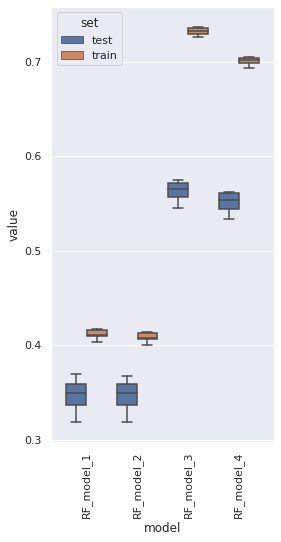

In [66]:
sns.set_style("whitegrid")
sns.set(rc = {'figure.figsize':(4,8)})
ax = sns.boxplot(x="model", y="value", hue="set", data=dfScoreResults[(dfScoreResults["metric"]=="R2")&(dfScoreResults["method"]=="Random Forest")])
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.plot()
plt.savefig('result_RF_TrainVsTest.png', dpi=300, format='png', bbox_inches='tight')

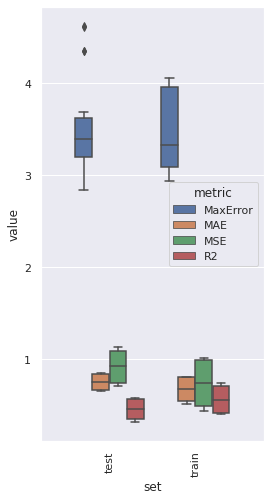

In [67]:
sns.set_style("whitegrid")
sns.set(rc = {'figure.figsize':(4,8)})
ax = sns.boxplot(x="set", y="value", hue="metric", data=dfScoreResults[dfScoreResults["method"]=="Random Forest"])
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.plot()
plt.savefig('result_RF_TrainVsTest.png', dpi=300, format='png', bbox_inches='tight')

### **LightGBM Internal validation**

In [68]:
removeModels = dfScoreResults.loc[dfScoreResults["value"]<0]["model"].unique()

In [69]:
removeModels = list(removeModels)
removeModels.append("RF_model_4")
removeModels.append("RF_model_1")
removeModels.append("RF_model_2")

In [70]:
removeModels

['LGBM_model_27',
 'LGBM_model_28',
 'LGBM_model_33',
 'LGBM_model_34',
 'LGBM_model_39',
 'LGBM_model_40',
 'LGBM_model_45',
 'LGBM_model_46',
 'RF_model_4',
 'RF_model_1',
 'RF_model_2']

In [71]:
dfScoreResults= dfScoreResults.loc[~(dfScoreResults["model"].isin(removeModels))]

In [72]:
print("\n Mean of R2:\n",dfScoreResults[(dfScoreResults["metric"]=="R2")&(dfScoreResults["set"]=="test")].groupby(["method"]).mean())
print("\n Std of R2:\n",dfScoreResults[(dfScoreResults["metric"]=="R2")&(dfScoreResults["set"]=="test")].groupby(["method"]).std())


 Mean of R2:
                   value
method                 
LightGBM       0.411380
Random Forest  0.562868

 Std of R2:
                   value
method                 
LightGBM       0.167550
Random Forest  0.013214


In [73]:
print("\n Mean of MSE:\n",dfScoreResults[(dfScoreResults["metric"]=="MSE")&(dfScoreResults["set"]=="test")].groupby(["method"]).mean())
print("\n Std of MSE:\n",dfScoreResults[(dfScoreResults["metric"]=="MSE")&(dfScoreResults["set"]=="test")].groupby(["method"]).std())


 Mean of MSE:
                   value
method                 
LightGBM       0.986888
Random Forest  0.728276

 Std of MSE:
                   value
method                 
LightGBM       0.282585
Random Forest  0.020458


In [74]:
print("\n Mean of MAE:\n",dfScoreResults[(dfScoreResults["metric"]=="MAE")&(dfScoreResults["set"]=="test")].groupby(["method"]).mean())
print("\n Std of MAE:\n",dfScoreResults[(dfScoreResults["metric"]=="MAE")&(dfScoreResults["set"]=="test")].groupby(["method"]).std())


 Mean of MAE:
                   value
method                 
LightGBM       0.776758
Random Forest  0.659373

 Std of MAE:
                   value
method                 
LightGBM       0.136938
Random Forest  0.007148


In [75]:
dfScoreResultsByParams = dfScoreResults[(dfScoreResults["metric"]=="R2")&(dfScoreResults["set"]=="test")].groupby(["model"]).mean()
dfScoreResultsByParams = dfScoreResultsByParams.sort_values('value', ascending = False)
dfScoreResultsByParamsSubset = dfScoreResultsByParams[dfScoreResultsByParams.value > 0.53]
print("\nMean R2 of best models:\n",dfScoreResultsByParamsSubset)
bestModels = list(dfScoreResultsByParamsSubset.index)
print("\n\nmodels showing best R2 in internal validation: \n",bestModels)
dfScoreResultsByParamsSTD = dfScoreResults[(dfScoreResults["metric"]=="R2")&(dfScoreResults["set"]=="test")].groupby(["model"]).std()
dfScoreResultsByParamsSTDSubset = dfScoreResultsByParamsSTD[dfScoreResultsByParams.value > 0.53]
print("\n Std R2 of best models:\n",dfScoreResultsByParamsSTDSubset)


Mean R2 of best models:
                   value
model                  
LGBM_model_18  0.635690
LGBM_model_24  0.634339
LGBM_model_23  0.625906
LGBM_model_17  0.625304
LGBM_model_12  0.624304
LGBM_model_6   0.622496
LGBM_model_5   0.591886
LGBM_model_11  0.591886
LGBM_model_16  0.584981
LGBM_model_22  0.583554
LGBM_model_42  0.574949
LGBM_model_48  0.574777
RF_model_3     0.562868
LGBM_model_47  0.539299
LGBM_model_41  0.539299
LGBM_model_21  0.538169
LGBM_model_15  0.538169


models showing best R2 in internal validation: 
 ['LGBM_model_18', 'LGBM_model_24', 'LGBM_model_23', 'LGBM_model_17', 'LGBM_model_12', 'LGBM_model_6', 'LGBM_model_5', 'LGBM_model_11', 'LGBM_model_16', 'LGBM_model_22', 'LGBM_model_42', 'LGBM_model_48', 'RF_model_3', 'LGBM_model_47', 'LGBM_model_41', 'LGBM_model_21', 'LGBM_model_15']

 Std R2 of best models:
                   value
model                  
LGBM_model_11  0.012512
LGBM_model_12  0.008743
LGBM_model_15  0.008970
LGBM_model_16  0.008660
LGBM_model_1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


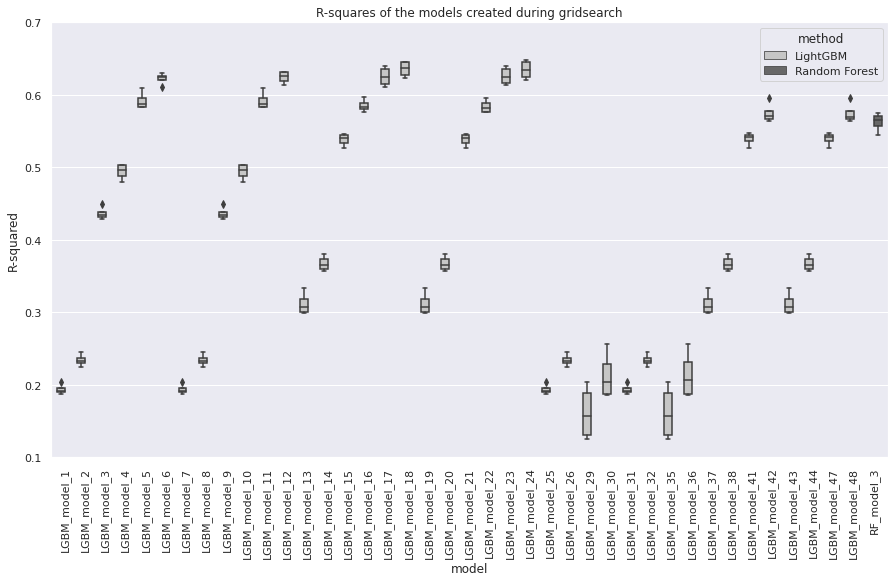

In [76]:
sns.set_style("whitegrid")
sns.set(rc = {'figure.figsize':(15,8)})
ax = sns.boxplot(x="model", y="value",hue="method", data=dfScoreResults[(dfScoreResults["metric"]=="R2")&(dfScoreResults["set"]=="test")],palette="Greys")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
ax.set(title='R-squares of the models created during gridsearch')
ax.set_ylabel("R-squared")
ax.set_ylim(0.1,0.7)
plt.plot()
plt.savefig('result_R2_RF-Vs-LGBM.png', dpi=300, format='png', bbox_inches='tight')

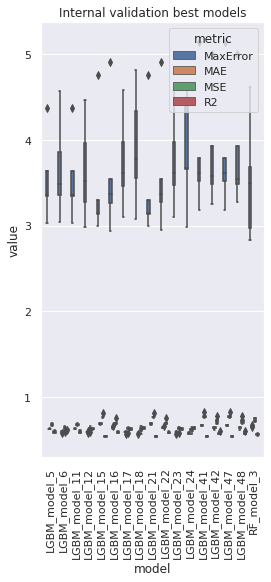

In [77]:
sns.set_style("whitegrid")
sns.set(rc = {'figure.figsize':(4,8)})
ax = sns.boxplot(x="model", y="value", hue="metric", data=dfScoreResults[(dfScoreResults["model"].isin(bestModels))&(dfScoreResults["set"]=="test")])
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
ax.set(title='Internal validation best models')
plt.plot()
plt.savefig('result_R2_RF-Vs-BestLGBM.png', dpi=300, format='png', bbox_inches='tight')

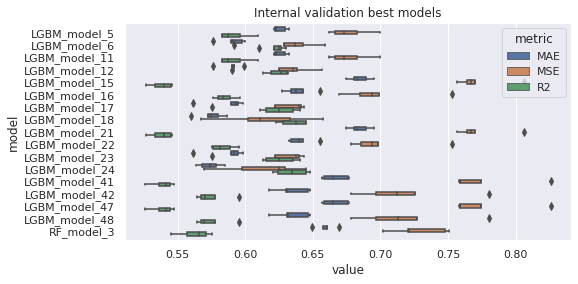

In [78]:
sns.set_style("whitegrid")
sns.set(rc = {'figure.figsize':(8,4)})
ax = sns.boxplot(x="value", y="model", hue="metric", data=dfScoreResults[(dfScoreResults["model"].isin(bestModels))&(dfScoreResults["set"]=="test")&(dfScoreResults["metric"]!="MaxError")])
ax.set(title='Internal validation best models')
plt.plot()
plt.savefig('result_R2_RF-Vs-BestLGBM2.png', dpi=300, format='png', bbox_inches='tight')

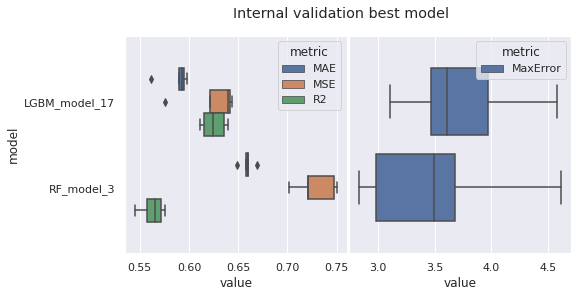

In [79]:
sns.set_style("whitegrid")
sns.set(rc = {'figure.figsize':(8,4)})
f, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, sharey=True)
ax = sns.boxplot(x="value", y="model", hue="metric", data=dfScoreResults[(dfScoreResults["model"].isin(["RF_model_3","LGBM_model_17"]))&(dfScoreResults["set"]=="test")&(dfScoreResults["metric"]!="MaxError")],ax=ax1)
ax = sns.boxplot(x="value", y="model", hue="metric", data=dfScoreResults[(dfScoreResults["model"].isin(["RF_model_3","LGBM_model_17"]))&(dfScoreResults["set"]=="test")&(dfScoreResults["metric"]=="MaxError")],ax=ax2)
f.suptitle('Internal validation best model')
ax2.set_ylabel("")
plt.subplots_adjust(wspace=.01, hspace=0)
plt.plot()
plt.savefig('result_R2_RF-Vs-BestLGBM3.png', dpi=300, format='png', bbox_inches='tight')

### **External validation**

In [80]:
ModelResultsTable.to_csv('MAO-B_Results.csv', index=False)

In [81]:
ModelResultsTable

,Model,R2,MAE,MSE,MaxError,Params,ExecutionTime
0,LGBM_model_17,0.641677,0.564123,0.612108,4.555408,"{'boosting_type': 'gbdt', 'learning_rate': 0.1...",0.861240
1,LGBM_model_23,0.641677,0.564123,0.612108,4.555408,"{'boosting_type': 'gbdt', 'learning_rate': 0.1...",0.848326
2,LGBM_model_24,0.648187,0.547057,0.600987,4.602650,"{'boosting_type': 'gbdt', 'learning_rate': 0.1...",1.214499
3,LGBM_model_18,0.646689,0.546797,0.603546,4.535002,"{'boosting_type': 'gbdt', 'learning_rate': 0.1...",1.253874
4,RF_model_3,0.586217,0.634892,0.706848,4.456202,"{'max_depth': 10, 'min_samples_leaf': 3, 'min_...",64.616052


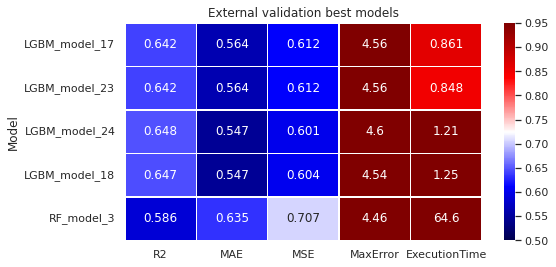

In [83]:
resultsTable = ModelResultsTable.drop(["Params"],axis=1)
resultsTable = resultsTable.set_index('Model')
sns.set(rc = {'figure.figsize':(8,4)})
ax = sns.heatmap(resultsTable, annot=True, fmt='.3g',linewidths=.5, cmap="seismic",vmin=.50,vmax=.95)
ax.set(title='External validation best models')
plt.savefig('result_RF-Vs-BestLGBM2.png', dpi=300, format='png', bbox_inches='tight')

## **Conclusions**
The LightGBM is slowly finding its way into practical use and may replace the RF as the most popular classifier. Our study shows that the emerging LightGBM also has potential in QSAR model and can deliver equally good results as the popular Random Forest. Both methods delivered comparable scores, in the internal and external validation, predicting the MAO-B inhibitors of small molecules.



### **Zip files**

In [84]:
! zip -r mao-b_results.zip . -i *.csv *.png

  adding: MAOB_bioactivity_pubchem.csv (deflated 96%)
  adding: MAOB_bioactivity.csv (deflated 92%)
  adding: result_RF_TrainVsTest.png (deflated 24%)
  adding: result_R2_RF-Vs-LGBM.png (deflated 31%)
  adding: MAOB_bioactivity_final.csv (deflated 75%)
  adding: descriptors_output.csv (deflated 96%)
  adding: MAO-B_Results.csv (deflated 64%)
  adding: result_R2_RF-Vs-BestLGBM2.png (deflated 12%)
  adding: result_RF-Vs-BestLGBM2.png (deflated 9%)
  adding: result_R2_RF-Vs-BestLGBM3.png (deflated 19%)
  adding: MAOB_bioactivity_data_preprocessed.csv (deflated 80%)
  adding: result_R2_RF-Vs-BestLGBM.png (deflated 17%)
